In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

# Drop the "Name" feature from both train and test datasets.

In [12]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

# Check the Missing values with features name.

In [17]:
features_with_nan = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(feature, np.round(train_df[feature].isnull().mean(), 3)*100, '% missing')

HomePlanet 2.3 % missing
CryoSleep 2.5 % missing
Cabin 2.3 % missing
Destination 2.1 % missing
Age 2.1 % missing
VIP 2.3 % missing
RoomService 2.1 % missing
FoodCourt 2.1 % missing
ShoppingMall 2.4 % missing
Spa 2.1 % missing
VRDeck 2.1999999999999997 % missing


In [20]:
for i in features_with_nan:
    print(i, '-->', train_df[i].dtypes)

HomePlanet --> object
CryoSleep --> object
Cabin --> object
Destination --> object
Age --> float64
VIP --> object
RoomService --> float64
FoodCourt --> float64
ShoppingMall --> float64
Spa --> float64
VRDeck --> float64


In [22]:
def fill_obj(feature):
    combine_mode_1 = pd.concat([train_df[feature], test_df[feature]]).mode()[0]
    train_df[feature].fillna(combine_mode_1, inplace=True)
    test_df[feature].fillna(combine_mode_1, inplace=True)

def fill_flt(feature):
    combine_mode_2 = pd.concat([train_df[feature], test_df[feature]]).mode()[0]
    train_df[feature].fillna(combine_mode_2, inplace=True)
    test_df[feature].fillna(combine_mode_2, inplace=True)

In [24]:
fill_obj('HomePlanet')
fill_obj('CryoSleep')
fill_obj('Destination')
fill_obj('VIP')
fill_obj('Cabin')

fill_flt('Age')
fill_flt('RoomService')
fill_flt('FoodCourt')
fill_flt('ShoppingMall')
fill_flt('Spa')
fill_flt('VRDeck')

### Numerical features

In [29]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [31]:
numerical_features = train_df.select_dtypes(include=['float64'])
numerical_features.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.069303,0.127015,0.034469,0.119759,0.099308
RoomService,0.069303,1.000000,-0.015126,0.052337,0.009244,-0.018624
FoodCourt,0.127015,-0.015126,1.000000,-0.013717,0.221468,0.224572
ShoppingMall,0.034469,0.052337,-0.013717,1.000000,0.014542,-0.007849
Spa,0.119759,0.009244,0.221468,0.014542,1.000000,0.147658
VRDeck,0.099308,-0.018624,0.224572,-0.007849,0.147658,1.000000


In [33]:
numerical_features.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.604970,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.421278,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


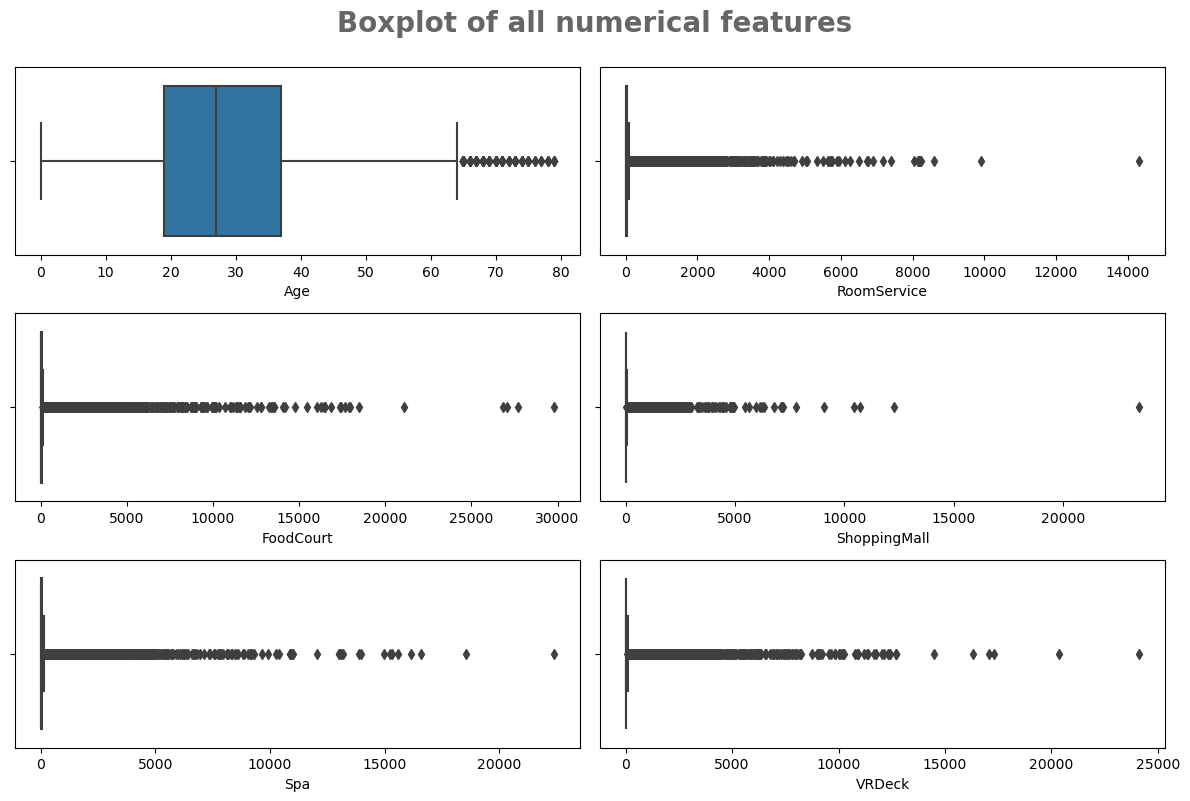

In [35]:
plt.figure(figsize=[12, 10])
plt.suptitle('Boxplot of all numerical features', fontsize=20, fontweight='bold', alpha=0.6, y=1.0)

for i, j in enumerate(numerical_features, 0):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=train_df[j], data=train_df)
    plt.tight_layout()

# Fix the outliers 

In [40]:
def fix_outliers(feature):
    IQR_train = train_df[feature].quantile(0.75) - train_df[feature].quantile(0.25)
    IQR_test = test_df[feature].quantile(0.75) - test_df[feature].quantile(0.25)

    train_upper = train_df[feature].quantile(0.75) + (IQR_train*3)
    test_upper = test_df[feature].quantile(0.75) + (IQR_test*3)

    train_df.loc[train_df[feature]>train_upper, feature] = train_upper
    test_df.loc[test_df[feature]>test_upper, feature] = test_upper

In [42]:
fix_outliers('RoomService')
fix_outliers('FoodCourt')
fix_outliers('ShoppingMall')
fix_outliers('Spa')
fix_outliers('VRDeck')

In [44]:
age_iqr = train_df['Age'].quantile(0.75) - train_df['Age'].quantile(0.25)
upper_age = train_df['Age'].quantile(0.75) + (age_iqr*1.5)

train_df.loc[train_df['Age']>upper_age, 'Age'] = upper_age
test_df.loc[test_df['Age']>upper_age, 'Age'] = upper_age

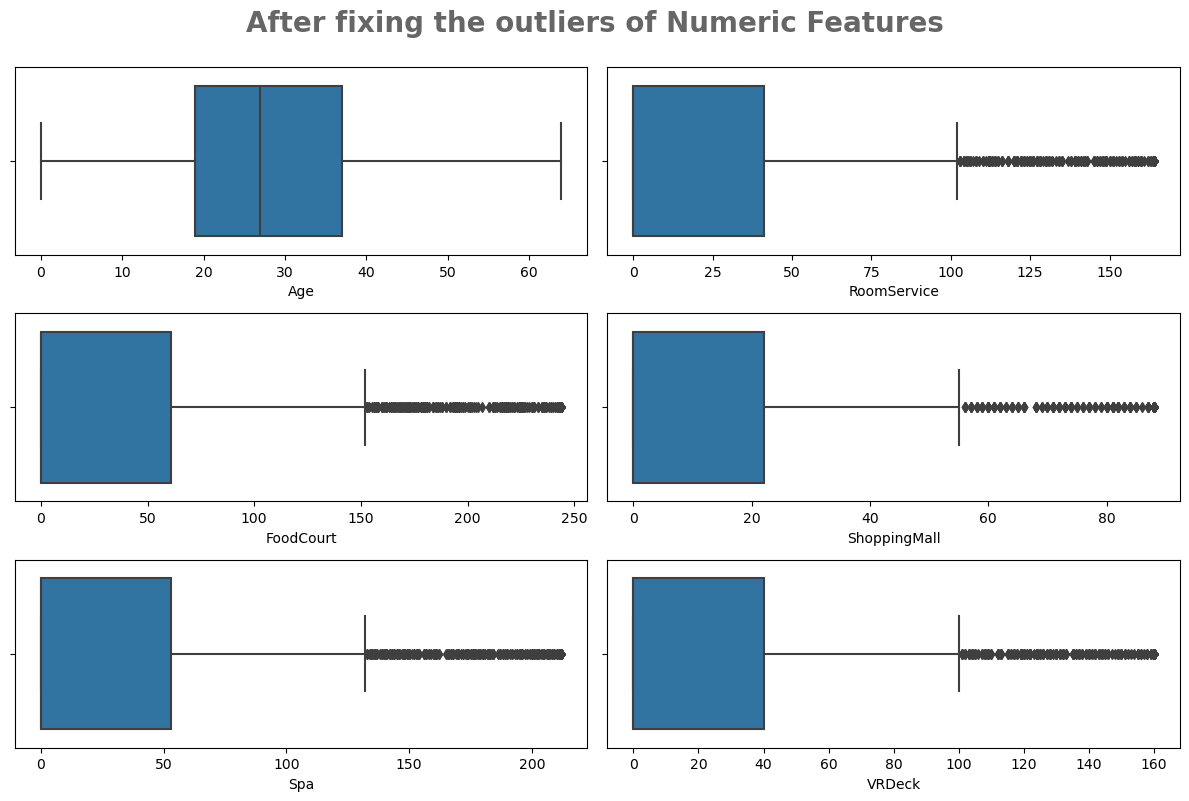

In [47]:
plt.figure(figsize=[12, 10])
plt.suptitle('After fixing the outliers of Numeric Features', fontsize=20, fontweight='bold', alpha=0.6, y=1.0)

for i, j in enumerate(numerical_features, 0):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=train_df[j], data=train_df)
    plt.tight_layout()

# Drop "PassengerId" from train and test dataset

In [53]:
train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)

# Encoding of the categorical features

In [58]:
cabin_dictionary = pd.concat([train_df['Cabin'], test_df['Cabin']]).value_counts().to_dict()
train_df['Cabin'] = train_df['Cabin'].map(cabin_dictionary)
test_df['Cabin'] = test_df['Cabin'].map(cabin_dictionary)

# Work on "Transported" feature

In [63]:
train_df['Transported'] = np.where(train_df['Transported']==False, 0, 1)

# Change the data type 'bool' to 'object'

In [68]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype('object')
train_df['VIP'] = train_df['VIP'].astype('object')

test_df['CryoSleep'] = test_df['CryoSleep'].astype('object')
test_df['VIP'] = test_df['VIP'].astype('object')

# Save the datsets

In [73]:
train_df.to_csv('cleaned_train_df.csv', index=False)
test_df.to_csv('cleaned_test_df.csv', index=False)